In [1]:
# Library imports
import json
import pandas as pd
from matplotlib import pyplot as plt
from urllib.request import urlopen

In [2]:
# url queries results containing 'JURONG EAST'
url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&q=JURONG%20EAST"
with urlopen(url) as source:
    out = source.read()
response = json.loads(out)

In [3]:
records = []
while response['result']['records']:
    records.extend(response['result']['records'])
    # go to next page
    url = f"https://data.gov.sg{response['result']['_links']['next']}"
    with urlopen(url) as source:
        out = source.read()
    response = json.loads(out)

In [4]:
len(records)

3187

In [5]:
# filter records by flat_type="4 ROOM"
# and leave only the fields `months` and `resale_price`
data = [{'month':x['month'], 'resale_price':int(x['resale_price'])} for x in records if x["flat_type"] == "4 ROOM"]

In [6]:
len(data)

952

In [7]:
df = pd.DataFrame(data)
df = df.groupby(
    by="month", 
    as_index=False
).aggregate(avg_resale_price=('resale_price', 'mean'))
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

In [8]:
df.head()

,month,avg_resale_price
0,2017-01-01,443266.666667
1,2017-02-01,413600.000000
2,2017-03-01,373375.000000
3,2017-04-01,402470.588235
4,2017-05-01,423080.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3

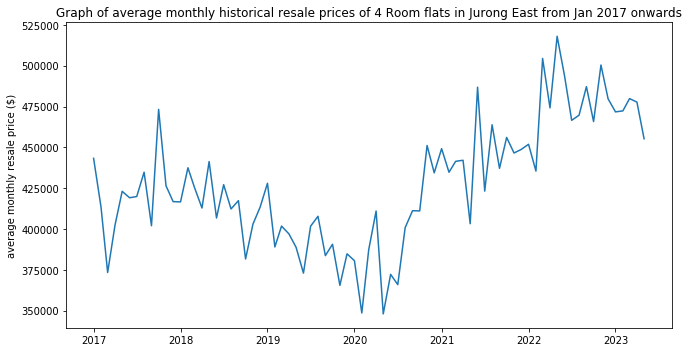

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["month"], df["avg_resale_price"])
plt.ylabel("average monthly resale price ($)")
ax.set_title(
    "Graph of average monthly historical resale prices of 4 Room flats in Jurong East from Jan 2017 onwards", 
    loc='center', 
    wrap=True
)
plt.tight_layout()
plt.savefig("section-4-chart.png")